### Preparing data

In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle('../delhi.pickle').rename(columns={'pm25':'PM25_AQI_value'})
stations = data.location.unique().tolist()
data['station_id'] = data.location.apply(lambda x: stations.index(x)+1001)
data.head(2)

,latitude,longitude,PM25_AQI_value,location,station_id
time,,,,,
2019-08-01 00:00:00+00:00,28.674045,77.131023,31.406977,"R K Puram, Delhi - DPCC",1001
2019-08-02 00:00:00+00:00,28.674045,77.131023,39.439024,"R K Puram, Delhi - DPCC",1001


In [3]:
delhi_data = data.copy()

 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


11 2019-08-12 00:00:00+00:00 4
1021
3.3433618625005086 minutes


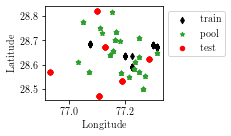

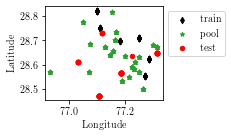

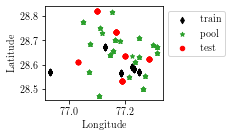

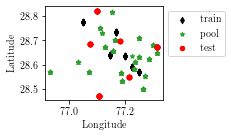

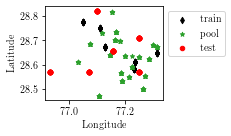

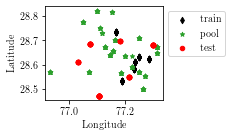

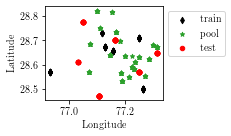

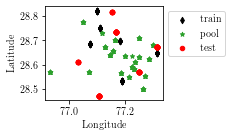

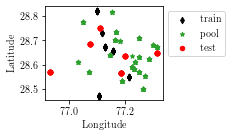

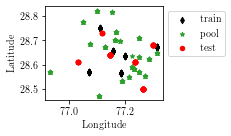

In [8]:
from time import time
init = time()
lhs_seed = 0
for seed in range(10):
    import pandas as pd
    from pyDOE2.doe_lhs import lhs
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from polire.placement.base import Base
    from IPython.display import clear_output
    import GPy
    from pyDOE2.doe_lhs import lhs
    import matplotlib.pyplot as plt
    from scipy.spatial.distance import cdist

    import matplotlib.pyplot as plt
    from scipy import stats
    p = print

    from time import time
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    from IPython.display import clear_output

    from sklearn.metrics import mean_squared_error, r2_score

    import seaborn as sns
    import sys
    from mpl_toolkits import mplot3d
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib
    from matplotlib.animation import FuncAnimation
    from matplotlib import rc

    from math import sqrt
    SPINE_COLOR = 'gray'
    p = print

    def latexify(fig_width=None, fig_height=None, columns=1):
        """Set up matplotlib's RC params for LaTeX plotting.
        Call this before plotting a figure.

        Parameters
        ----------
        fig_width : float, optional, inches
        fig_height : float,  optional, inches
        columns : {1, 2}
        """

        # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

        # Width and max height in inches for IEEE journals taken from
        # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

        assert(columns in [1,2])

        if fig_width is None:
            fig_width = 3.39 if columns==1 else 6.9 # width in inches

        if fig_height is None:
            golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
            fig_height = fig_width*golden_mean # height in inches

        MAX_HEIGHT_INCHES = 8.0
        if fig_height > MAX_HEIGHT_INCHES:
            print("WARNING: fig_height too large:" + fig_height + 
                  "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
            fig_height = MAX_HEIGHT_INCHES

        params = {'backend': 'ps',
                  'text.latex.preamble': [r'\usepackage{gensymb}'],
                  'axes.labelsize': 10, # fontsize for x and y labels (was 10)
                  'axes.titlesize': 10,
                  'font.size': 10, # was 10
                  'legend.fontsize': 10, # was 10
                  'xtick.labelsize': 10,
                  'ytick.labelsize': 10,
                  'text.usetex': True,
                  'figure.figsize': [fig_width,fig_height],
                  'font.family': 'serif'
        }

        matplotlib.rcParams.update(params)

    def format_axes(ax):

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color(SPINE_COLOR)
            ax.spines[spine].set_linewidth(0.5)

        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_tick_params(direction='out', color=SPINE_COLOR)

        return ax

    ### Data

    data = delhi_data.copy()
    data.head(2)

    global_all_stations = data.station_id.unique()
    p(global_all_stations)

    ### Train, pool, test splits

    from sklearn.cluster import kmeans_plusplus
    tmpdata = data.drop_duplicates(subset=['station_id'])
    all_locs = tmpdata[['longitude', 'latitude']].values
    norm_all_locs = (all_locs - all_locs.min(axis=0))/(all_locs.max(axis=0) - all_locs.min(axis=0))
    while True:
        s = lhs(2, 6, random_state=lhs_seed)
        c_i = cdist(norm_all_locs, s).argmin(axis=0)
        lhs_seed += 1
        if len(set(c_i)) == 6:
            break
    ### Global config

    window = 1
    all_time = data.index.unique()[:-1]
    data = data.loc[all_time]
    Xcols = ['longitude', 'latitude']#, 'temperature', 'pressure', 'humidity', 'wind']
    ycols = ['PM25_AQI_value']

    np.random.seed(seed)
    ################## KMeans 
    global_test_stations = global_all_stations[kmeans_plusplus(all_locs, n_clusters=6, random_state=seed)[1]]
    ################## Random
#     global_test_stations = global_all_stations[np.random.choice(len(global_all_stations), size=6, replace=False)]
    ################## LHS
#     global_test_stations = global_all_stations[c_i]
    global_train_pool_stations = np.array(sorted(set(global_all_stations) - set(global_test_stations)))
    global_pool_stations, global_train_stations = train_test_split(global_train_pool_stations, test_size=6, random_state=seed)
    p('train', len(global_train_stations))
    p('test', len(global_test_stations))
    p('pool', len(global_pool_stations))

    pd.to_pickle(global_test_stations, 'global_test'+str(seed)+'kmeans'+'.station')
    pd.to_pickle(global_train_stations, 'global_train'+str(seed)+'kmeans'+'.station')

    latexify(3.32, 2)
    trn_locs = data[data.station_id.isin(global_train_stations)][['longitude', 'latitude']].drop_duplicates().values
    tst_locs = data[data.station_id.isin(global_test_stations)][['longitude', 'latitude']].drop_duplicates().values
    pool_locs = data[data.station_id.isin(global_pool_stations)][['longitude', 'latitude']].drop_duplicates().values

    print(trn_locs.shape, tst_locs.shape, pool_locs.shape)

    fig, ax = plt.subplots()
    ss = 20
    ax.scatter(trn_locs[:,0], trn_locs[:,1], c='black', s=ss, marker='d', label='train')
    ax.scatter(pool_locs[:,0], pool_locs[:,1], c='tab:green', s=ss, marker='*', label='pool')
    ax.scatter(tst_locs[:,0], tst_locs[:,1], c='red', s=ss, label='test')
    ax.legend(bbox_to_anchor=(1,1));
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    fig.tight_layout()
    fig.savefig('imgs/tpt'+str(seed)+'kmeans'+'.pdf')
    ### GP + MI
    np.random.seed(0)

    train_stations = global_train_stations.copy().tolist()
    test_stations = global_test_stations.copy().tolist()
    pool_stations = global_pool_stations.copy().tolist()

    gpmi_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    gpmi_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])
    gpmi_deploys = []

    for t_i in range(0,12,window):
    #     print('train', len(train_stations))
    #     print('pool', len(pool_stations))

        tmp_df = data.loc[all_time[t_i:t_i+window]]

        train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
        test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
        pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

        xscaler = StandardScaler()
        yscaler = StandardScaler()
        xscaler.fit(train_df[Xcols])
        yscaler.fit(train_df[ycols])

        local_preds = []
        local_tests = []
        chosen_i_list = []
        for local_t in tmp_df.index.unique():
            clear_output(wait=True)
            trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
            tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
            trn_y = yscaler.transform(train_df.loc[local_t][ycols])
            tst_y = test_df.loc[local_t][ycols]
    #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    #         kern_long = GPy.kern.Linear(1, ARD=True, active_dims=[0])
    #         kern_lat = GPy.kern.Matern32(1, ARD=True, active_dims=[1])
    #         kernel = kern_long + kern_lat
            kernel = GPy.kern.Matern32(trn_X.shape[1], ARD=True)
            model = GPy.models.GPRegression(trn_X, trn_y-trn_y.mean(), kernel, normalizer=False)
            model.optimize_restarts(10, verbose=False, robust=True)

            gpmi_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)[0] + trn_y.mean()).ravel()
            gpmi_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

            pool_X = xscaler.transform(pool_df.loc[local_t][Xcols].values.reshape(-1, len(Xcols)))

            K = model.kern.K(trn_X)
            K_inv = np.linalg.pinv(K)
            K_s = model.kern.K(pool_X, trn_X)
            K_ss = model.kern.K(pool_X, pool_X)

            ### Choosing next sensor
            chosen_i = None
            best_delta = -np.inf
            numer = K_ss.diagonal() - (K_s@K_inv@K_s.T).diagonal()
            for i in range(pool_X.shape[0]):
                a_bar = sorted(set(range(pool_X.shape[0])) - set([i]))
                second = K_ss[i, a_bar]
                denom = K_ss[i,i] - second.reshape(1,-1)@np.linalg.pinv(K_ss[np.ix_(a_bar, a_bar)])@second.reshape(-1,1)

                delta = numer[i]/denom
                if delta>best_delta:
                    best_delta = delta
                    chosen_i = i
            chosen_i_list.append(chosen_i)
            p(t_i, local_t, chosen_i)

        # Choose mode of chosen values
        chosen_i = stats.mode(chosen_i_list).mode[0]
        print(pool_stations[chosen_i])
        gpmi_deploys.append(pool_stations[chosen_i])

        # Updating pool and train
        train_stations.append(pool_stations.pop(chosen_i))
        train_stations = sorted(train_stations)
    gpmi_result_df_preds.to_pickle("gpmi"+str(seed)+'kmeans'+".pred")
    gpmi_result_df_tests.to_pickle('testdf'+str(seed)+'kmeans'+'.pickle')
    pd.to_pickle(gpmi_deploys, 'gpmi'+str(seed)+'kmeans'+'.dep')

    ### NSGP + MI

    # init = time()
    # from NSGPy.NumPy import LLS
    # np.random.seed(0)

    # train_stations = global_train_stations.copy().tolist()
    # test_stations = global_test_stations.copy().tolist()
    # pool_stations = global_pool_stations.copy().tolist()

    # nsgpmi_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    # nsgpmi_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])

    # for t_i in range(0,12, window):
    # #     print('train', len(train_stations))
    # #     print('pool', len(pool_stations))

    #     tmp_df = data.loc[all_time[t_i:t_i+window]]

    #     train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
    #     test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
    #     pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

    #     xscaler = StandardScaler()
    #     yscaler = StandardScaler()
    #     xscaler.fit(train_df[Xcols])
    #     yscaler.fit(train_df[ycols])

    #     local_preds = []
    #     local_tests = []
    #     chosen_i_list = []
    #     for local_t in tmp_df.index.unique():
    #         clear_output(wait=True)
    #         trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
    #         tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
    #         trn_y = yscaler.transform(train_df.loc[local_t][ycols])
    #         tst_y = test_df.loc[local_t][ycols]
    # #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    # #         kern_long = GPy.kern.Linear(1, ARD=True, active_dims=[0])
    # #         kern_lat = GPy.kern.Matern32(1, ARD=True, active_dims=[1])
    # #         kernel = kern_long + kern_lat

    #         model = LLS(trn_X.shape[1], N_l_bar=1, kernel='rbf')
    #         model.fit(trn_X, trn_y-trn_y.mean())

    #         nsgpmi_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)[0] + trn_y.mean()).ravel()
    #         nsgpmi_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

    #         pool_X = xscaler.transform(pool_df.loc[local_t][Xcols].values.reshape(-1, len(Xcols)))

    #         L = model.predict_lengthscales_(trn_X)
    #         K = model.K_(trn_X, L)
    #         K_inv = np.linalg.pinv(K)
    #         L_s = model.predict_lengthscales_(pool_X)
    #         K_s = model.K_(pool_X, L_s, trn_X, L)
    #         K_ss = model.K_(pool_X, L_s)

    #         ### Choosing next sensor
    #         chosen_i = None
    #         best_delta = -np.inf
    #         numer = K_ss.diagonal() - (K_s@K_inv@K_s.T).diagonal()
    #         for i in range(pool_X.shape[0]):
    #             a_bar = sorted(set(range(pool_X.shape[0])) - set([i]))
    #             second = K_ss[i, a_bar]
    #             denom = K_ss[i,i] - second.reshape(1,-1)@np.linalg.pinv(K_ss[np.ix_(a_bar, a_bar)])@second.reshape(-1,1)

    #             delta = numer[i]/denom
    #             if delta>best_delta:
    #                 best_delta = delta
    #                 chosen_i = i
    #         chosen_i_list.append(chosen_i)
    #         p(t_i, local_t, chosen_i)

    #     # Choose mode of chosen values
    #     chosen_i = stats.mode(chosen_i_list).mode[0]
    #     print(pool_stations[chosen_i])

    #     # Updating pool and train
    #     train_stations.append(pool_stations.pop(chosen_i))
    #     train_stations = sorted(train_stations)
    # nsgpmi_result_df_preds.to_pickle("nsgpmi"+str(seed)+'kmeans'+".pred")
    # p((time()-init)/60, 'minutes')

    ### GP + Entropy

    import GPy
    np.random.seed(0)
    train_stations = global_train_stations.copy().tolist()
    test_stations = global_test_stations.copy().tolist()
    pool_stations = global_pool_stations.copy().tolist()

    gpvar_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    gpvar_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])
    gpvar_deploys = []

    for t_i in range(0, 12, window):
        tmp_df = data.loc[all_time[t_i:t_i+window]]

        train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
        test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
        pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

        xscaler = StandardScaler()
        yscaler = StandardScaler()
        xscaler.fit(train_df[Xcols])
        yscaler.fit(train_df[ycols])

        chosen_i_list = []
        for local_t in tmp_df.index.unique():
            trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
            tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
            trn_y = yscaler.transform(train_df.loc[local_t][ycols])
            tst_y = test_df.loc[local_t][ycols]
    #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    #         kern_long = GPy.kern.Linear(1, ARD=True, active_dims=[0])
    #         kern_lat = GPy.kern.Matern32(1, ARD=True, active_dims=[1])
    #         kernel = kern_long + kern_lat
            kernel = GPy.kern.Matern32(trn_X.shape[1], ARD=True)
            model = GPy.models.GPRegression(trn_X, trn_y-trn_y.mean(), kernel, normalizer=False)
            model.optimize_restarts(10, verbose=False, robust=True)

            gpvar_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)[0] + trn_y.mean()).ravel()
            gpvar_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

            pool_X = xscaler.transform(pool_df.loc[local_t][Xcols].values.reshape(-1, len(Xcols)))

            K = model.kern.K(trn_X)
            K_inv = np.linalg.pinv(K)
            K_s = model.kern.K(pool_X, trn_X)
            K_ss = model.kern.K(pool_X, pool_X)

            ### Choosing next sensor
            numer = K_ss.diagonal() - (K_s@K_inv@K_s.T).diagonal()
            chosen_i = np.argmax(numer)
            chosen_i_list.append(chosen_i)

        chosen_i = stats.mode(chosen_i_list).mode[0]
        gpvar_deploys.append(pool_stations[chosen_i])
        print(pool_stations[chosen_i])
        # Updating pool and train
        train_stations.append(pool_stations.pop(chosen_i))
        train_stations = sorted(train_stations)
    gpvar_result_df_preds.to_pickle("gpvar"+str(seed)+'kmeans'+".pred")
    pd.to_pickle(gpvar_deploys, 'gpvar'+str(seed)+'kmeans'+'.dep')

    ### GP + Random

    import GPy
    np.random.seed(0)

    train_stations = global_train_stations.copy().tolist()
    test_stations = global_test_stations.copy().tolist()
    pool_stations = global_pool_stations.copy().tolist()

    gprand_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    gprand_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])
    gprand_deploys = []

    for t_i in range(0,12, window):
    #     print('train', len(train_stations))
    #     print('pool', len(pool_stations))

        tmp_df = data.loc[all_time[t_i:t_i+window]]

        train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
        test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
        pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

        xscaler = StandardScaler()
        yscaler = StandardScaler()
        xscaler.fit(train_df[Xcols])
        yscaler.fit(train_df[ycols])

        for local_t in tmp_df.index.unique():
            trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
            tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
            trn_y = yscaler.transform(train_df.loc[local_t][ycols])
            tst_y = test_df.loc[local_t][ycols]
    #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    #         kern_long = GPy.kern.Linear(1, ARD=True, active_dims=[0])
    #         kern_lat = GPy.kern.Matern32(1, ARD=True, active_dims=[1])
    #         kernel = kern_long + kern_lat
            kernel = GPy.kern.Matern32(trn_X.shape[1], ARD=True)
            model = GPy.models.GPRegression(trn_X, trn_y-trn_y.mean(), kernel, normalizer=False)
            model.optimize_restarts(10, verbose=False, robust=True)

            gprand_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)[0] + trn_y.mean()).ravel()
            gprand_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

        ### Choosing next sensor
        np.random.seed(t_i)
        chosen_i = np.random.choice(len(pool_stations))
        gprand_deploys.append(pool_stations[chosen_i])
        print(pool_stations[chosen_i])

        # Updating pool and train
        train_stations.append(pool_stations.pop(chosen_i))
        train_stations = sorted(train_stations)
    gprand_result_df_preds.to_pickle("gprand"+str(seed)+'kmeans'+".pred")
    pd.to_pickle(gprand_deploys, 'gprand'+str(seed)+'kmeans'+'.dep')

    ### GP+NoDep

    # import GPy
    # np.random.seed(0)
    # train_stations = global_train_stations.copy().tolist()
    # test_stations = global_test_stations.copy().tolist()
    # pool_stations = global_pool_stations.copy().tolist()

    # gpnod_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    # gpnod_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])

    # for t_i in range(0, 12, window):
    #     tmp_df = data.loc[all_time[t_i:t_i+window]]

    #     train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
    #     test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
    #     pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

    #     xscaler = StandardScaler()
    #     yscaler = StandardScaler()
    #     xscaler.fit(train_df[Xcols])
    #     yscaler.fit(train_df[ycols])

    #     chosen_i_list = []
    #     for local_t in tmp_df.index.unique():
    #         trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
    #         tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
    #         trn_y = yscaler.transform(train_df.loc[local_t][ycols])
    #         tst_y = test_df.loc[local_t][ycols]
    # #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    #         kern_long = GPy.kern.Matern32(1, ARD=True, active_dims=[0])
    #         kern_lat = GPy.kern.Matern32(1, ARD=True, active_dims=[1])
    #         kernel = kern_long * kern_lat
    #         model = GPy.models.GPRegression(trn_X, trn_y-trn_y.mean(), kernel, normalizer=False)
    #         model.optimize_restarts(10, verbose=False, robust=True)

    #         gpnod_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)[0] + trn_y.mean()).ravel()
    #         gpnod_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

    # gpnod_result_df_preds.to_pickle("gpnod"+str(seed)+'kmeans'+".pred")

    ### RF + Random

    from sklearn.ensemble import RandomForestRegressor
    np.random.seed(0)

    train_stations = global_train_stations.copy().tolist()
    test_stations = global_test_stations.copy().tolist()
    pool_stations = global_pool_stations.copy().tolist()

    rfrand_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    rfrand_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])
    rfrand_deploys = []

    for t_i in range(0,12, window):
    #     print('train', len(train_stations))
    #     print('pool', len(pool_stations))

        tmp_df = data.loc[all_time[t_i:t_i+window]]

        train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
        test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
        pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

        xscaler = StandardScaler()
        yscaler = StandardScaler()
        xscaler.fit(train_df[Xcols])
        yscaler.fit(train_df[ycols])

        local_preds = []
        local_tests = []
        for local_t in tmp_df.index.unique():
            trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
            tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
            trn_y = yscaler.transform(train_df.loc[local_t][ycols])
            tst_y = test_df.loc[local_t][ycols]
    #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

            model = RandomForestRegressor(random_state=0)
            model.fit(trn_X, trn_y)

            rfrand_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)).ravel()
            rfrand_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

        ### Choosing next sensor
        np.random.seed(t_i)
        chosen_i = np.random.choice(len(pool_stations))
        clear_output(wait=True)
        rfrand_deploys.append(pool_stations[chosen_i])
        print(t_i, pool_stations[chosen_i])

        # Updating pool and train
        train_stations.append(pool_stations.pop(chosen_i))
        train_stations = sorted(train_stations)
    rfrand_result_df_preds.to_pickle("rfrand"+str(seed)+'kmeans'+".pred")
    pd.to_pickle(rfrand_deploys, 'rfrand'+str(seed)+'kmeans'+'.dep')

    ### RF-NoDep

    # from sklearn.ensemble import RandomForestRegressor
    # np.random.seed(0)

    # train_stations = global_train_stations.copy().tolist()
    # test_stations = global_test_stations.copy().tolist()
    # pool_stations = global_pool_stations.copy().tolist()

    # rfnod_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    # rfnod_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])

    # for t_i in range(0,12, window):

    #     tmp_df = data.loc[all_time[t_i:t_i+window]]

    #     train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
    #     test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
    #     pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

    #     xscaler = StandardScaler()
    #     yscaler = StandardScaler()
    #     xscaler.fit(train_df[Xcols])
    #     yscaler.fit(train_df[ycols])

    #     for local_t in tmp_df.index.unique():
    #         trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
    #         tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
    #         trn_y = yscaler.transform(train_df.loc[local_t][ycols])
    #         tst_y = test_df.loc[local_t][ycols]
    # #         p(trn_X.shape, tst_X.shape, trn_y.shape, tst_y.shape)

    #         model = RandomForestRegressor(random_state=0)
    #         model.fit(trn_X, trn_y)

    #         rfnod_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)).ravel()
    #         rfnod_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

    # rfnod_result_df_preds.to_pickle("rfnod"+str(seed)+'kmeans'+".pred")

    ### RF+SVR+KNN QBC

    from modAL.models import ActiveLearner, CommitteeRegressor

    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor


    np.random.seed(0)

    train_stations = global_train_stations.copy().tolist()
    test_stations = global_test_stations.copy().tolist()
    pool_stations = global_pool_stations.copy().tolist()

    qbc_result_df_preds = pd.DataFrame(columns=[1,2,3,4,5,6])
    qbc_result_df_tests = pd.DataFrame(columns=[1,2,3,4,5,6])
    qbc_deploys = []

    for t_i in range(0,12, window):
        tmp_df = data.loc[all_time[t_i:t_i+window]]

        train_df = tmp_df[tmp_df.station_id.isin(train_stations)]
        test_df = tmp_df[tmp_df.station_id.isin(test_stations)]
        pool_df = tmp_df[tmp_df.station_id.isin(pool_stations)]

        xscaler = StandardScaler()
        yscaler = StandardScaler()
        xscaler.fit(train_df[Xcols])
        yscaler.fit(train_df[ycols])

        local_preds = []
        local_tests = []
        chosen_i_list = []
        for local_t in tmp_df.index.unique():
            clear_output(wait=True)
            trn_X = xscaler.transform(train_df.loc[local_t][Xcols])
            tst_X = xscaler.transform(test_df.loc[local_t][Xcols])
            trn_y = yscaler.transform(train_df.loc[local_t][ycols])
            tst_y = test_df.loc[local_t][ycols]
            
#             ActiveLearner(estimator=RandomForestRegressor(random_state=0), X_training=trn_X, y_training=trn_y),
            learners = [ActiveLearner(estimator=SVR(), X_training=trn_X, y_training=trn_y),
                        ActiveLearner(estimator=KNeighborsRegressor(), X_training=trn_X, y_training=trn_y)]

            def ensemble_regression_std(regressor, X):
                _, std = regressor.predict(X, return_std=True)
                return np.argmax(std)

            model = CommitteeRegressor(learner_list=learners, query_strategy=ensemble_regression_std)

            qbc_result_df_preds.loc[local_t,:] = yscaler.inverse_transform(model.predict(tst_X)).ravel()
            qbc_result_df_tests.loc[local_t,:] = tst_y.values.ravel()

            pool_X = xscaler.transform(pool_df.loc[local_t][Xcols].values.reshape(-1, len(Xcols)))

            chosen_i, _ = model.query(pool_X)
            chosen_i_list.append(chosen_i)
            p(t_i, local_t, chosen_i)

        # Choose mode of chosen values
        chosen_i = stats.mode(chosen_i_list).mode[0]
        qbc_deploys.append(pool_stations[chosen_i])
        print(pool_stations[chosen_i])

        # Updating pool and train
        train_stations.append(pool_stations.pop(chosen_i))
        train_stations = sorted(train_stations)
    qbc_result_df_preds.to_pickle("qbc"+str(seed)+'kmeans'+".pred")
    pd.to_pickle(qbc_deploys, 'qbc'+str(seed)+'kmeans'+'.dep')
    p((time()-init)/60, 'minutes')

In [5]:
pool_df.loc[local_t][Xcols].values.reshape(-1, len(Xcols)).shape

(10, 2)